# Python for Meteorology, Oceanography, and Climate

## Practical Example

### Dataset
This synthetic dataset contains information on the playability of badminton under different weather conditions. It includes features such as outlook (Sunny, Overcast, Rain), temperature (Hot, Mild, Cool), humidity (High, Normal), and wind (Weak, Strong). The target variable indicates whether badminton can be played ('Yes') or not ('No') based on these weather conditions. This dataset can be used for training machine learning models to predict the suitability of playing badminton given specific weather conditions.

[LINK](https://www.kaggle.com/datasets/aditya0kumar0tiwari/play-badminton)

**Columns**
1. **OUTLOOK** _Weather Outlook_
2. **TEMPERATURE** _Weather Temprature_
3. **HUMIDITY** _Weather Humidity_
4. **WIND** _Weather Wind_
5. **PLAY_BADMINTON** _Can play badminton in this weather or not._

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('dataset/badminton_dataset.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No


In [11]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play_Badminton'], dtype='object')

In [12]:
df.dtypes

Outlook           object
Temperature       object
Humidity          object
Wind              object
Play_Badminton    object
dtype: object

### Dataset summary

In [13]:
num_rows, num_columns = df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

''' As the dataset has the categorical columns so let include the object datatype for summary statistic'''
summary = df.describe(include='object')
print(summary)

Number of rows: 36
Number of columns: 5
         Outlook Temperature Humidity  Wind Play_Badminton
count         36          36       36    36             36
unique         3           3        2     2              2
top     Overcast        Cool     High  Weak             No
freq          12          12       18    18             24


In [14]:
for column in df.select_dtypes(include=['object']).columns:
    print(f'\nValue counts for {column}:')
    print(df[column].value_counts())


Value counts for Outlook:
Outlook
Overcast    12
Sunny       12
Rain        12
Name: count, dtype: int64

Value counts for Temperature:
Temperature
Cool    12
Mild    12
Hot     12
Name: count, dtype: int64

Value counts for Humidity:
Humidity
High      18
Normal    18
Name: count, dtype: int64

Value counts for Wind:
Wind
Weak      18
Strong    18
Name: count, dtype: int64

Value counts for Play_Badminton:
Play_Badminton
No     24
Yes    12
Name: count, dtype: int64


### Data Cleaning

#### Missing values

In [15]:
df.isnull().sum()

Outlook           0
Temperature       0
Humidity          0
Wind              0
Play_Badminton    0
dtype: int64

The dataset does not have any missing values

### Data Visualization

In [16]:
def plot_categorical_distribution(df, columns, colors=None, background_color=None, foreground_color=None):
    if background_color:
        plt.rcParams['figure.facecolor'] = background_color
    if foreground_color:
        plt.rcParams['axes.labelcolor'] = foreground_color
        plt.rcParams['axes.edgecolor'] = foreground_color
        plt.rcParams['xtick.color'] = foreground_color
        plt.rcParams['ytick.color'] = foreground_color

    for col in columns:
        if col in df.columns:
            color = colors[col] if colors and col in colors else None

            df[col].value_counts().plot(kind='bar', color=color)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Column '{col}' not found in the DataFrame.")


custom_colors = {
    'Outlook': 'lightblue',
    'Temperature': 'lightgreen',
    'Humidity': 'lightsalmon',
    'Wind': 'lightcoral',
    'Play_Badminton': 'lightgray'
}

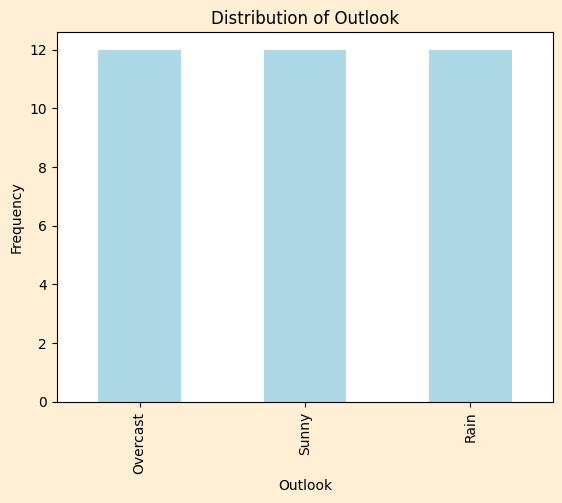

In [17]:
plot_categorical_distribution(df, ['Outlook'], colors=custom_colors, background_color='#FFEFD5', foreground_color='black')

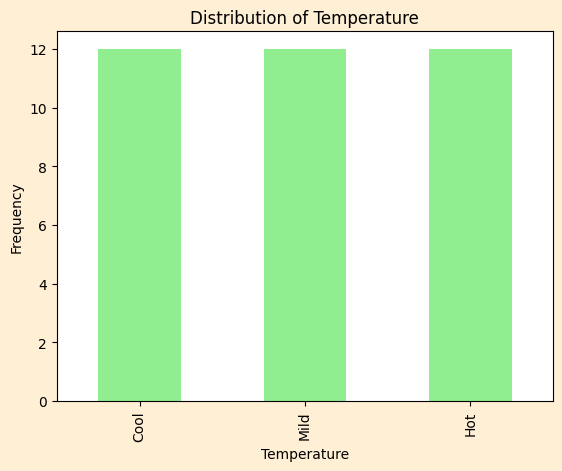

In [18]:
plot_categorical_distribution(df, ['Temperature'], colors=custom_colors, background_color='#FFEFD5', foreground_color='black')

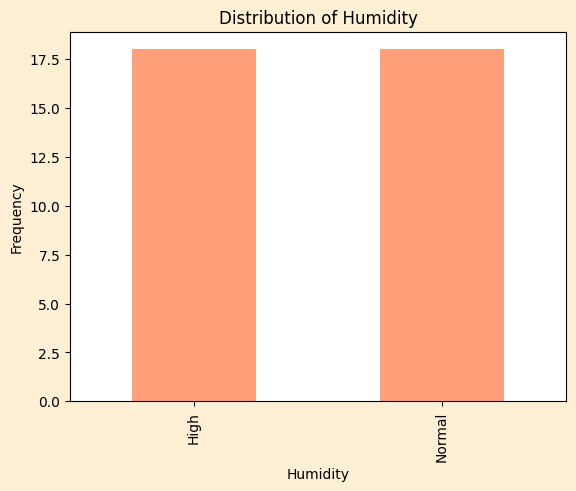

In [19]:
plot_categorical_distribution(df, ['Humidity'], colors=custom_colors, background_color='#FFEFD5', foreground_color='black')

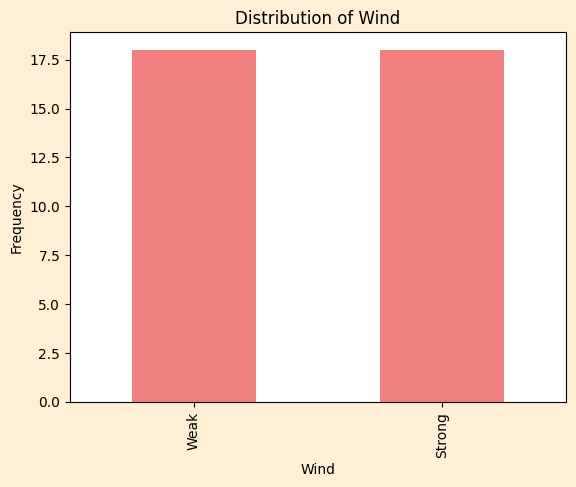

In [20]:
plot_categorical_distribution(df, ['Wind'], colors=custom_colors, background_color='#FFEFD5', foreground_color='black')

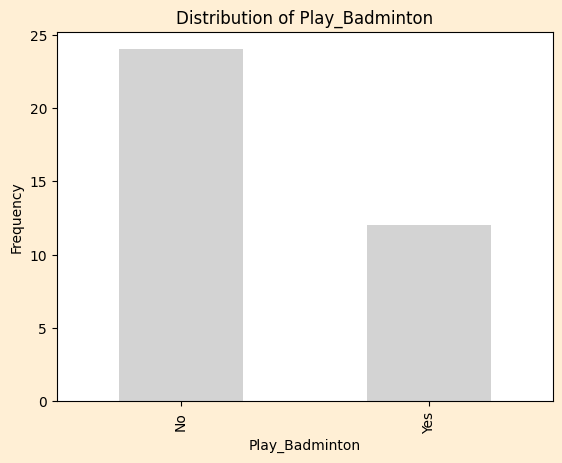

In [21]:
plot_categorical_distribution(df, ['Play_Badminton'], colors=custom_colors, background_color='#FFEFD5', foreground_color='black')

### Advanced data exploration methods

In [23]:
# For Chi Square test
from scipy.stats import chi2_contingency

for column in df.columns[:-1]:  # Exclude the target variable 'Play_Badminton'
    contingency_table = pd.crosstab(df['Play_Badminton'], df[column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for independence between {column} and 'Play_Badminton':")
    print(f"Chi2 value: {chi2}, p-value: {p}")
    if p < 0.05: 
        print(f"The variable {column} is likely not independent of 'Play_Badminton'.")
    else:
        print(f"The variable {column} is likely independent of 'Play_Badminton'.")
    print()

Chi-square test for independence between Outlook and 'Play_Badminton':
Chi2 value: 9.0, p-value: 0.011108996538242308
The variable Outlook is likely not independent of 'Play_Badminton'.

Chi-square test for independence between Temperature and 'Play_Badminton':
Chi2 value: 0.0, p-value: 1.0
The variable Temperature is likely independent of 'Play_Badminton'.

Chi-square test for independence between Humidity and 'Play_Badminton':
Chi2 value: 0.0, p-value: 1.0
The variable Humidity is likely independent of 'Play_Badminton'.

Chi-square test for independence between Wind and 'Play_Badminton':
Chi2 value: 15.125, p-value: 0.00010062192211963679
The variable Wind is likely not independent of 'Play_Badminton'.



In [30]:
from itertools import combinations
import seaborn as sns


def plot_categorical_relationships(df, columns):
    for col1, col2 in combinations(columns, 2):
        if col1 in df.columns and col2 in df.columns:
            plt.figure(figsize=(6, 4))
            crosstab = pd.crosstab(df[col1], df[col2], normalize='index') * 100  # Normalize to get percentages
            sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='.2f')  # Format to display two decimal places
            plt.title(f'Heatmap of {col1} vs {col2}')
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()
        else:
            print(f"One of the columns '{col1}' or '{col2}' not found in the DataFrame.")

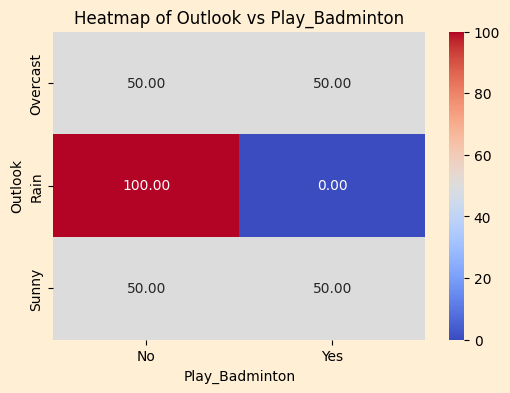

In [31]:
columns_to_plot = ['Outlook', 'Play_Badminton']
plot_categorical_relationships(df, columns_to_plot)

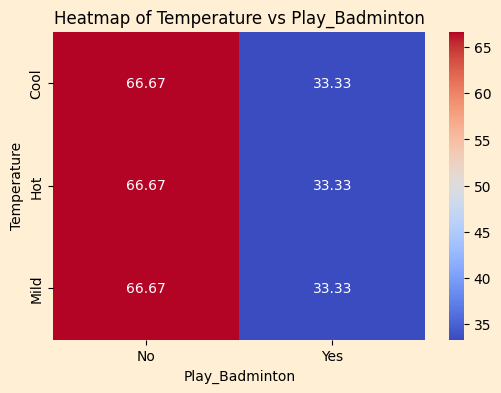

In [32]:
columns_to_plot = ['Temperature', 'Play_Badminton']
plot_categorical_relationships(df, columns_to_plot)

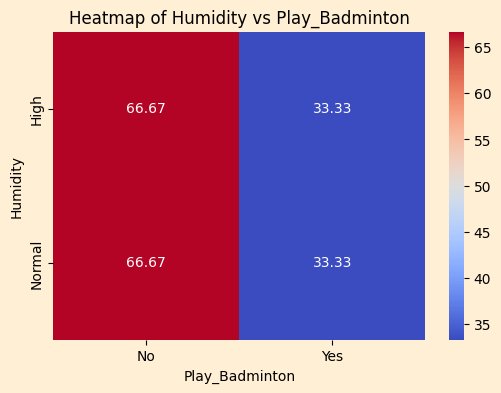

In [33]:
columns_to_plot = ['Humidity', 'Play_Badminton']
plot_categorical_relationships(df, columns_to_plot)

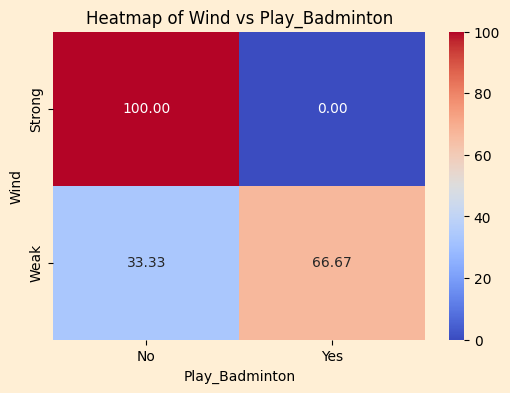

In [34]:
columns_to_plot = ['Wind', 'Play_Badminton']
plot_categorical_relationships(df, columns_to_plot)